# Modeling Sales Data with Python

We're going to be looking at sales data and conducting low scale marketing analytics based on information extracted from a dataset. For those entirely new to sales data, there is an explaining of the key columns after we import the dataset.

**This tutorial is designed to work as a general tutorial for modeling sales data given within a structured data format at a small to medium scale.** 

Big data would require MapReduce and PySpark, which is not covered here. Another method of sorting through and storing the data is through the [SQLite package](http://pythoncentral.io/introduction-to-sqlite-in-python/), but we will be completing commands you can run with SQL code exclusively with Python as I'm assuming you, the reader, have no database to import tables to. 

In terms of difficulty, this tutorial should be relatively easy to implement and understand. The hardest part would be understanding the terms in the dataset and applying it to the example problems provided within.

<a id='Table of Contents'></a>
## Table of Contents

1. [What's special about sales data?](#Whats special about sales data?)

2. [Dataset](#Dataset)

3. [Reviewing Dataset](#Reviewing Dataset)

4. [Key-value Pairs](#Key-value Pairs)

5. [Problems to Solve](#Problems to Solve)

    a. [How much profit did we earn within a given month and year?](#How much profit did we earn within a given month and year)
    
    b. [What are the values which determine the discount band?](#What are the values which determine the discount band?)
    
    c. [Which product was our most profitable? Which region was our most profitable? Which segment was our most profitable?](#Which product was our most profitable? Which region was our most profitable? Which segment was our most profitable?)
    
    d. [Whats the average units sold of each product across all regions?](#Whats the average units sold of each product across all regions)
    
    e. [Whats the average sale price of each product in each region?](#Whats the average sale price of each product in each region)
    
    f. [Combining the solutions from 4(d) and 5(e) into a single table](#Combining the solutions from 4 and 5 into a single table)

6. [References](#References)

<a id='Whats special about sales data?'></a>
## What's special about sales data?

In sales data, there are several analysis techinques we may use. We can figure out the overall profit of each month by grouping together purchases made across a given timeframe and reporting which time periods were the best. You can also discover the percentage of discounts provided to each item when sold, as well as applying market segmentation on your customers (e.g. age, private/public sector, location, gender, etc.). Basket analysis--or affinity analysis--is another method used on data which looks at what items a consumer purchased as well as the methods used to make the purchases.

**What type of decisions you can make from this dataset?**

You can find out how well your company is doing in terms of profits. You can figure out the range of discounts for all products and draw a correlation between profits and discounts.

You can also figure out which areas to focus in, whether that would be allocating resources to a particular product, geographical location, or demographic. One can also determine the amount of product sold across all locations where the product is available. In addition to each product's sales, you can also figure out the average sale price within a given region or multiple regions at once, using only a few modules in Python and its code.


**What techniques are applicable to other sales datasets?**

While these are a few things applicable to *this* example dataset in the notebook, you can also perform many more analysis techniques on the data. 

You can examine data from customer purchase histories to figure out forecasts and trends on data. You can take information from call centers, segment down each individual into certain "segments"--whether it be based on personality, behavior, or another metric--and perform individual analysis on each segment.

Most companies also conduct "Predictive Analytics," where information in a dataset is used to generate a forecast to predict many items, such as demand, whether there is a seasonal effect, and figuring out potential pitfalls with current products. Predictive Analytics is also useful for advising managers and higher ups on future decisions for the business as well as identifying red flags and mistakes the company could be making.

[Return to Table of Contents](#Table of Contents)

<a id='Dataset'></a>
## Dataset

The dataset that we're using can be found [at PowerBI's website here](https://powerbi.microsoft.com/en-us/documentation/powerbi-sample-download-the-financial-sample-workbook/)

The dataset is not terribly large; less than 100 KB in size and several hundred rows.

Once downloaded, we start by importing the dataset as a pandas dataframe. Pandas is a Python package providing fast, flexible, and easy to read data structures (specifically structured, not semi-structured or unstructured). It translates well from an SQL table and Excel, both in importing and exporting. This tutorial will feature both Series (1D data structures, where it shows a key and single value as an output rather than a separate column) and Dataframes (2D data structures, where information is neatly sorted into multiple columns/rows).

You can download pandas in SSH/command prompt with the following command.

    pip install pandas

[Return to Table of Contents](#Table of Contents)

In [52]:
#Import the dataset as a pandas dataframe.
import pandas as pd

#Imports Excel file. Pandas tries to retain the format of the sheet.
data_df = pd.read_excel('data/Financial Sample.xlsx', error_bad_lines=False)
data_df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014
5,Government,Germany,Carretera,None,1513.0,3,350,529550.0,0.00,529550.00,393380.0,136170.00,2014-12-01,12,December,2014
6,Midmarket,Germany,Montana,None,921.0,5,15,13815.0,0.00,13815.00,9210.0,4605.00,2014-03-01,3,March,2014
7,Channel Partners,Canada,Montana,None,2518.0,5,12,30216.0,0.00,30216.00,7554.0,22662.00,2014-06-01,6,June,2014
8,Government,France,Montana,None,1899.0,5,20,37980.0,0.00,37980.00,18990.0,18990.00,2014-06-01,6,June,2014
9,Channel Partners,Germany,Montana,None,1545.0,5,12,18540.0,0.00,18540.00,4635.0,13905.00,2014-06-01,6,June,2014


<a id='Reviewing Dataset'></a>
## Reviewing Dataset

The data provided contains a mixture of column results. Some columns are information simply given as is--such as Segment and Country--while other columns--such as Sales--contains results from running a formula on one or more columns in the provided dataset.

### Information

*The following columns below contain information--string and numerical--provided by the dataset itself and not solved by a formula within the Excel sheet we imported.*

**Segment** - Market Segment the product is sold in.

**Country** - Location where market segment is location.

**Product** - The item sold within the Segment.

**Discount Band** - How much discount was applied. This is a *qualitative* value. Related to the 'Discounts' column.

**Units Sold** - Simply the number of products sold.

**Manufacturing Price** - How much the product cost to create.

**Sale Price** - The retail amount the product was sold for. Units Sold * Sale Price.

### Formulation

*The following columns below derive their results from one or more other columns within the dataframe.*

**Gross Sales** - How much you earned before discounts are factored.

**Discounts** - The amount a consumer does not have to pay for the product.

**Sales** - How much you earned after discounts are factored from sold products.

**COGS** - "Cost of Goods Sold;" the direct costs of the goods sold. This includes the cost of materials as well as the cost of labor to create the units sold.

**Profit** - The net revenue after all expenses are accounted for and subtracted from the Sales amount.

[Return to Table of Contents](#Table of Contents)

<a id='Key-value Pairs'></a>
## Key-value Pairs

A key-value pair (KVP) is a set of two linked data items. The key is a unique identifier for each item (in this case row) while the value is data identified and associated with a particular key.

**Examples of key-value pairs**

1. (firstname, daffy), where firstname = key and daffy = value as single item.

2. (ID, [Name, DOB, SSN]), where ID = key and [Name, DOB, SSN] = value as array.

This is a dataset without a clearly defined key/value pair! There isn't a column with unique identifiers anywhere within the data we have. If we were to put these values into a schema, we may have some trouble.

Luckily for us, we can create our own key. For this dataset, all we need to do is create a column "Entry #" with a ID number going from 1 to infinity.

[Return to Table of Contents](#Table of Contents)

In [53]:
# Create a list to store the data, then adds a column to the dataframe.
keyID = []
Num = 0
# For each row in the column,
for row in data_df['Segment']:
    # if more than a value,
    Num = Num + 1
    keyID.append(Num)
    
data_df['ID'] = keyID
data_df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,ID
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014,1
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014,2
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014,3
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014,4
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014,5
5,Government,Germany,Carretera,None,1513.0,3,350,529550.0,0.00,529550.00,393380.0,136170.00,2014-12-01,12,December,2014,6
6,Midmarket,Germany,Montana,None,921.0,5,15,13815.0,0.00,13815.00,9210.0,4605.00,2014-03-01,3,March,2014,7
7,Channel Partners,Canada,Montana,None,2518.0,5,12,30216.0,0.00,30216.00,7554.0,22662.00,2014-06-01,6,June,2014,8
8,Government,France,Montana,None,1899.0,5,20,37980.0,0.00,37980.00,18990.0,18990.00,2014-06-01,6,June,2014,9
9,Channel Partners,Germany,Montana,None,1545.0,5,12,18540.0,0.00,18540.00,4635.0,13905.00,2014-06-01,6,June,2014,10


In the above code, we initialized an array with 'keyID = []', then ran it through a for loop. In the part where it is 'data_df['Segment']:', you could use any of the other columns in the dataset so long as it has a value in each row. Each loop increases a counter by 1--to affect the placement of the ID within the initialized array--then appends the value to that place in the array. Once the array is constructed, we create a new column with the array values and it matches up neatly with the rest of the data.

*Why do we do this?*

If we assign a ID to each value, then we can search by ID; our newly generated, customized key, rather than doing guesswork and searching through each row.

The code below shows an example where I extract a few rows of information based on IDs in the 'ID' column. By passing in a list, you can select anywhere from a single value to several values of your choosing, much like if you were trying to find a particular entry through a search engine!

In [54]:
ID_list = ['1','2','3']

data_df[data_df.ID.isin(ID_list)]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,ID
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014,1
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014,2
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014,3


The code segment below takes the headers of the datasets, treats them as a separate row, then converts the column headers to its own list. It then switches around the first entry in the list with the last entry in the list (where first entry = 'cols[-1:]' and last entry ] 'cols[:-1]'.

In a normal format, you could extract or manipulate values based on 'cols[m:n]', where m is the beginning of the range and n the end of the range. 

This case below sets n to '' for the first and m to '' for the last entry; this implies it searches through the entire list beforehand. The -1 in each part takes the entire list but the first (and the last). By adding both lists together, you've effectively created a new list where the new values are added on, while the values which aren't changed remain the same.

In [55]:
#Convert the column headers to a list, then rearrange the list.
cols = data_df.columns.tolist()
#Makes the last column (ID) be the first column
cols = cols[-1:] + cols[:-1]
cols

['ID',
 u'Segment',
 u'Country',
 u'Product',
 u'Discount Band',
 u'Units Sold',
 u'Manufacturing Price',
 u'Sale Price',
 u'Gross Sales',
 u'Discounts',
 u' Sales',
 u'COGS',
 u'Profit',
 u'Date',
 u'Month Number',
 u'Month Name',
 u'Year']

In typical structured data, it's usually expected to have your key as the first column, then the associated values in the following columns. The next code takes the 'cols' list above and overwrites the dataset we have.

**Note:** Performing the following command does *not* delete any information within the columns and rows. It will automatically move the location of each value within the dataframe to the matching column. The code segment above and below are great methods for easily reorganizing a pandas dataframe.

In [56]:
#Rearranges the dataframe based on your new column order.
data_df = data_df[cols]
data_df

,ID,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,1,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,2,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,3,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
3,4,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014
4,5,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014
5,6,Government,Germany,Carretera,None,1513.0,3,350,529550.0,0.00,529550.00,393380.0,136170.00,2014-12-01,12,December,2014
6,7,Midmarket,Germany,Montana,None,921.0,5,15,13815.0,0.00,13815.00,9210.0,4605.00,2014-03-01,3,March,2014
7,8,Channel Partners,Canada,Montana,None,2518.0,5,12,30216.0,0.00,30216.00,7554.0,22662.00,2014-06-01,6,June,2014
8,9,Government,France,Montana,None,1899.0,5,20,37980.0,0.00,37980.00,18990.0,18990.00,2014-06-01,6,June,2014
9,10,Channel Partners,Germany,Montana,None,1545.0,5,12,18540.0,0.00,18540.00,4635.0,13905.00,2014-06-01,6,June,2014


Excellent! Now we have a table structure with a clearly defined and easy to see key-value pairs for each row of information.

**Key:** ID

**Values:** Segment, Country, ..., Year

<a id='Problems to Solve'></a>
# Problems to Solve

So now that we have our master table set up, we want to solve a few questions. For example.

1) How much profit did we earn within a given month/year?

2) What are the values which determine the discount band?

3) Which product was our most profitable? Which region was our most profitable? Which segment was our most profitable?
    
    i) What about least profitable?

4) What's the average units sold of each product across all regions/segments?

5) What's the average sale price of each product in each region?

[Return to Table of Contents](#Table of Contents)

For certain problems, I will splinter off parts of the master table into separate dataframes. This limits the amount of information you have to look at for each problem, as well as reducing the time of running commands through the smaller dataframes.

<a id='How much profit did we earn within a given month and year'></a>
## 1) How much profit did we earn within a given month and year?

[Return to Table of Contents](#Table of Contents)

In this section, we're going to take a look **only** at the profit values across months and years, independent of products, regions, and segments. We keep the key as ID, but change the value array to [Profit, Month, Year].

In [57]:
#Create a new, compact dataframe for examination. 
#This will include the profit column, as well as the month and year column.
#Important: The order you enter your rows is the order they will appear in the new dataframe!
profit_table_simple = data_df[['ID','Profit','Month Name','Year']].copy()

#Displays table and the first five results
profit_table_simple.head()

,ID,Profit,Month Name,Year
0,1,16185.0,January,2014
1,2,13210.0,January,2014
2,3,10890.0,June,2014
3,4,4440.0,June,2014
4,5,12350.0,June,2014


Since we do not have many values to work with, we want to see how much profit was generated in a month.

To do that, we execute a 'group by' statement on the table, using *both* the year and the month as our mapping columns. Once all values are mapped by the year and month, they are reduced down with the sum function, where .sum() is used on the Profit column. In order to keep our dataframe intact, we reset the index so we can output the results into a freshly made and functioned dataframe.

In [58]:
#In the first groupby, it groups by the Year value first, then the Month Name second.
#Once grouped, it sums up the profit corresponding to the groups.
#Reset index removes any existing index and sets it to a new default index; preventing a calculation hiccup.
#We also set the result as a new table. This lets us sort the values in the columns and manipulate them further.
pro_table = profit_table_simple.groupby(['Year', "Month Name"]).Profit.sum().reset_index()
pro_table

,Year,Month Name,Profit
0,2013,December,691564.08
1,2013,November,765502.30
2,2013,October,1657795.10
3,2013,September,763603.03
4,2014,April,929984.57
5,2014,August,791066.42
6,2014,December,2025765.90
7,2014,February,1148547.39
8,2014,January,814028.68
9,2014,July,923865.68


### i) Which month was the most profitable?

Say your manager wants to know wants to know what the profits are for each month.

To do this, we'll first sort the table by the Profit column by highest to lowest (ascending = False), then we'll redefine the dataframe by concatenating entries in a row to fit the format of our plotting code. Once formatted, the information in the dataframe is used to generate a bar chart showing the profits from each month.

In [59]:
#Sorts the table by Profit. 'Ascending=False' puts the highest value at the top.
pro_result = pro_table.sort_values('Profit', ascending=False)

#Since 'pro_result' is a pre-sorted table, we can use just .head() to display the top 5 values.
pro_result.head()

,Year,Month Name,Profit
6,2014,December,2025765.90
14,2014,October,1781985.92
2,2013,October,1657795.10
10,2014,June,1473753.82
7,2014,February,1148547.39


In [60]:
#Concatenates Month Name and Year together to generate our y-value for a plot.
#Profit will be our x-value.
#We also have to convert the Year value to a string.
pro_result['MY'] = pro_result['Month Name'] + pro_result['Year'].astype(str)
pro_result

,Year,Month Name,Profit,MY
6,2014,December,2025765.90,December2014
14,2014,October,1781985.92,October2014
2,2013,October,1657795.10,October2013
10,2014,June,1473753.82,June2014
7,2014,February,1148547.39,February2014
15,2014,September,1023132.24,September2014
4,2014,April,929984.57,April2014
9,2014,July,923865.68,July2014
12,2014,May,828640.06,May2014
8,2014,January,814028.68,January2014


The next code segment may be difficult to interpret, so I will break it down here.

**Module installation**

First, we import a few modules: Numpy and matplotlib (specifically pyplot). You can install these packages--as well as the other packages--with pip install. Example commands below, typed into SSH/command prompt.

    pip install numpy
    
    pip install matplotlib
    
For matplotlib, you do *not* need to specify .pyplot. If you download the entire module--matplotlib--as is, you can access all packages inside of it.

**Code Explanation**

For a bar chart, you need a few things. The Y column, the position of the y column, and the x column. The x/y columns contain values, while the position of the y column returns a length of how many entries are analyzed in the chart.

The command 'plt.bar' is part of pyplot. The first entry is the number of y values mapped next the values within the profit column. The alpha value determines the transparency of the bars on the chart. The 'plt.xticks' assigns the labels from the y column to each x value; each month/year pair is a label in the y column, so there will be that many bars on the chart.

The reason we rotate the chart 90 degrees is because bar charts in pyplot are normally created with horizontal bars. This corrects it so the x axis is on the bottom and the y axis on the left with descending values. Lastly you apply the labels to the plot, then finally show the plot below as a separate image you can download and save.

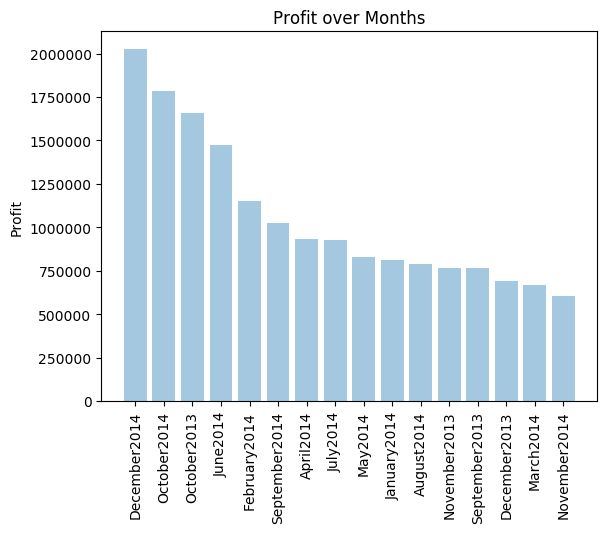

In [61]:
#We import the matplotlib for multiple kinds of plots in this question and the next questions.
#Create a bar chart
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#Established y as the MY column, as well as defining the number of variables across the y-axis.
#X position is defined as the profit values for each MY value.
#By setting the dataframe columns as the variables, we can easily adapt new entrys into the chart.
y = pro_result['MY']
y_pos = np.arange(len(pro_result['MY']))
x_pos = pro_result['Profit'] 

#Setup chart by defining which variables go into the chart. Alpha changes the transparency of the bars.
plt.bar(y_pos, x_pos, alpha = 0.4)
plt.xticks(y_pos, y)
#Rotates x-axis text, then adds labels.
plt.xticks(rotation=90)
plt.ylabel('Profit')
plt.title('Profit over Months')
#Shows a final plot.
plt.show()

Looks like December in 2014 was our most profitable month, with a little over 2 million in net revenue.

<a id='What are the values which determine the discount band?'></a>
## 2) What are the values which determine the discount band?

The next question would solve one particular issue; translating a qualitative value (e.g. word) into a quantitative value (e.g. 3, 4; 5). This problem takes a label of a discount band and, using what is recorded in the Discounts column, creates the label range for each sale.

[Return to Table of Contents](#Table of Contents)

In [62]:
#Creating another dataframe here...
discounts_table = data_df[['ID','Segment','Country','Product','Gross Sales','Discount Band','Discounts']].copy()

#Displays first five results. Don't worry if the Discounts column is all zeroes right now; that can happen.
discounts_table.head()

,ID,Segment,Country,Product,Gross Sales,Discount Band,Discounts
0,1,Government,Canada,Carretera,32370.0,None,0.0
1,2,Government,Germany,Carretera,26420.0,None,0.0
2,3,Midmarket,France,Carretera,32670.0,None,0.0
3,4,Midmarket,Germany,Carretera,13320.0,None,0.0
4,5,Midmarket,Mexico,Carretera,37050.0,None,0.0


For this part, we're going to create a python function.

A python function is a block of code storing a set of commands. The function does not run within your current code unless the function is called by another command within the code.

This function is simple division and addition:

    1 - [(Sales - Discounts) / Sales]

It's a similar format--the second half--to figuring out the error percentage from an experiment by comparing it to the theoretical. This particular setup, however, ensures the base value is at 0; discounts--or even markups--would decrease or increase the value from 1 respectively. A value of 0.05 indicates a 5% discount, while a value of -0.07 indicates a 7% markup.

The function applies the equation to each row in the dataframe once called upon, using the ID column as its pivot and check for unique entries in the dataframe. In this scenario, having a key like ID allows for easier formatting and fewer hassles with functions.

While there already is a Discounts column in the table, that column displays the *sales amount* subtracted from the Gross Sales value, not the percentage.

In [63]:
#We're going to create a customized function.
#This takes the Gross Sales - Discounts, then divides it by the Gross Sales value. Similar to finding error %.
def discounts(row):
    #The reason there's a 1 in front is because we're figuring out the percent of a discount, not the adjusted sale.
    return 1 - (row['Gross Sales'] - row['Discounts']) / (row['Gross Sales'])

#These two lines create a new column and append the results for each row onto the current dataframe.
discounts_table['Discount %'] = discounts_table.apply(discounts, axis=1)
discounts_table.head()

,ID,Segment,Country,Product,Gross Sales,Discount Band,Discounts,Discount %
0,1,Government,Canada,Carretera,32370.0,None,0.0,0.0
1,2,Government,Germany,Carretera,26420.0,None,0.0,0.0
2,3,Midmarket,France,Carretera,32670.0,None,0.0,0.0
3,4,Midmarket,Germany,Carretera,13320.0,None,0.0,0.0
4,5,Midmarket,Mexico,Carretera,37050.0,None,0.0,0.0


The next few commands are pulling out information to see what all the dataframe has so you don't have to scroll through it, such as what regions there are, what produts there are, and what segments there are. They search through every row of a dataframe and pull out distinct values, using the '.unique()' suffix appended at the end of each command.

You can also convert these values to a list, but for now we're only looking at what we have.

In [64]:
#Lists the unique 'Product' values within the table.
discounts_table.Product.unique()

array([u'Carretera', u'Montana', u'Paseo', u'Velo', u'VTT', u'Amarilla'], dtype=object)

In [65]:
#Lists the unique 'Country' values within the table.
discounts_table.Country.unique()

array([u'Canada', u'Germany', u'France', u'Mexico',
       u'United States of America'], dtype=object)

In [66]:
#Lists the unique 'Segment' values within the table.
discounts_table.Segment.unique()

array([u'Government', u'Midmarket', u'Channel Partners', u'Enterprise',
       u'Small Business'], dtype=object)

These next two code segments combine a group by function with a minimize and maximize function.

The group by function uses the labels within the 'Discount Band' column without sorting for mapping out the values, then it reduces it down to how many types of Bands there are. In this case, it is four separate bands. The reduction is found by eliminating all rows which are not the minimum or maximum value associated with each band.

By finding the minimum and maximum values of each band, you can make an estimate of the quantitative equivalent of a qualitative value.

In [67]:
#Finds the minimum value for Discount %'s within a given band.
discounts_table.groupby(['Discount Band'], sort=False)['Discount %'].min()

Discount Band
None      0.00
Low       0.01
Medium    0.05
High      0.10
Name: Discount %, dtype: float64

In [68]:
#Finds the maximum value for Discount %'s within a given band.
discounts_table.groupby(['Discount Band'], sort=False)['Discount %'].max()

Discount Band
None      0.00
Low       0.04
Medium    0.09
High      0.15
Name: Discount %, dtype: float64

Looks like the range is as follows for Discount Band classification based on our results. Please note there may be potential rounding involved.

**None:** x = 0

**Low:** 0 < x < 5

**Medium:** 5 <= x < 10

**High:** 10 <= x < 15

<a id='Which product was our most profitable? Which region was our most profitable? Which segment was our most profitable?'></a>
## 3) Which product was our most profitable? Which region was our most profitable? Which segment was our most profitable?

This problem statement gives an idea of how to figure out what areas to expand on, what areas to cut, and etc. This is a section of determining what areas are your best performing and which areas are not your best performing.

I sort the best performing products, countries, and segments into their own tables, and repeat the same for the lowest performing products, countries, and segments. Similar concepts from the previous problems are present here, where I group by a particular column, then sum up profit values associated with the respective value in the grouped column, then reset their index so it generates a clean dataframe.

I also save each of the resulting tables as its own table. This is so I can freely manipulate one result and run further analysis on it without risking changes to *all* of the tables at once. This is done by setting a new table equal to the function you perform on a current table, such as the example below:

    p1_table = profits_table.groupby(['Product']).Profit.sum().reset_index()

'p1_table' is the new dataframe we define in the equation, while the right hand side is the function we apply to the current table. Unlike a list or array, we do **not** need to initialize an empty dataframe; we can simply create them by setting one equal to a function.

For the results, I only display the top 5 by adding '.head()' to the dataframe I want to display. You can add an integer value inside of the parentheseses without quotation marks to change the amount of results shown at once; the default value is 5.

[Return to Table of Contents](#Table of Contents)

In [69]:
#Creating another dataframe here...
#We can use this same table for both parts.
profits_table = data_df[['ID','Segment','Country','Product','Profit']].copy()
profits_table.head()

,ID,Segment,Country,Product,Profit
0,1,Government,Canada,Carretera,16185.0
1,2,Government,Germany,Carretera,13210.0
2,3,Midmarket,France,Carretera,10890.0
3,4,Midmarket,Germany,Carretera,4440.0
4,5,Midmarket,Mexico,Carretera,12350.0


### a) By Product

In [70]:
#Group by product then sum, then sort, then output top 5 results in a single box.
p1_table = profits_table.groupby(['Product']).Profit.sum().reset_index()
#Sorts the table by Profit. 'Ascending=False' puts the highest value at the top.
p1_result = p1_table.sort_values('Profit', ascending=False)

#Since 'pro_result' is a pre-sorted table, we can use just .head() to display the top 5 values.
p1_result.head()

,Product,Profit
3,Paseo,4797437.950
4,VTT,3034608.020
0,Amarilla,2814104.060
5,Velo,2305992.465
2,Montana,2114754.880


### b) By Country

In [71]:
#Group by product then sum, then sort, then output top 5 results in a single box.
p2_table = profits_table.groupby(['Country']).Profit.sum().reset_index()
#Sorts the table by Profit. 'Ascending=False' puts the highest value at the top.
p2_result = p2_table.sort_values('Profit', ascending=False)

#Since 'pro_result' is a pre-sorted table, we can use just .head() to display the top 5 values.
p2_result.head()

,Country,Profit
1,France,3781020.780
2,Germany,3680388.820
0,Canada,3529228.885
4,United States of America,2995540.665
3,Mexico,2907523.110


### c) By Segment

In [72]:
#Group by product then sum, then sort, then output top 5 results in a single box.
p3_table = profits_table.groupby(['Segment']).Profit.sum().reset_index()
#Sorts the table by Profit. 'Ascending=False' puts the highest value at the top.
p3_result = p3_table.sort_values('Profit', ascending=False)

#Since 'pro_result' is a pre-sorted table, we can use just .head() to display the top 5 values.
p3_result.head()

,Segment,Profit
2,Government,1.138817e+07
4,Small Business,4.143168e+06
0,Channel Partners,1.316803e+06
3,Midmarket,6.601031e+05
1,Enterprise,-6.145456e+05


### i) What about least profitable?

Same thing as above, except we create a new table with 'ascending=True' instead of 'ascending=False'.

### a) By Product

In [73]:
#Sorts the table by Profit.
p4_result = p1_table.sort_values('Profit', ascending=True)

#Since 'pro_result' is a pre-sorted table, we can use just .head() to display the top 5 values.
p4_result.head()

,Product,Profit
1,Carretera,1826804.885
2,Montana,2114754.880
5,Velo,2305992.465
0,Amarilla,2814104.060
4,VTT,3034608.020


### b) By Country

In [74]:
#Sorts the table by Profit.
p5_result = p2_table.sort_values('Profit', ascending=True)

#Since 'pro_result' is a pre-sorted table, we can use just .head() to display the top 5 values.
p5_result.head()

,Country,Profit
3,Mexico,2907523.110
4,United States of America,2995540.665
0,Canada,3529228.885
2,Germany,3680388.820
1,France,3781020.780


### c) By Segment

In [75]:
#Sorts the table by Profit.
p6_result = p3_table.sort_values('Profit', ascending=True)

#Since 'pro_result' is a pre-sorted table, we can use just .head() to display the top 5 values.
p6_result.head()

,Segment,Profit
1,Enterprise,-6.145456e+05
3,Midmarket,6.601031e+05
0,Channel Partners,1.316803e+06
4,Small Business,4.143168e+06
2,Government,1.138817e+07


<a id='Whats the average units sold of each product across all regions'></a>
## 4) What's the average units sold of each product across all regions?

In this section, we'll be looking at series with more than two columns to solve the problem.

[Return to Table of Contents](#Table of Contents)

In [76]:
#Creating another dataframe here...
#We can use this same table for both parts.
avg1_table = data_df[['ID','Segment','Country','Product','Units Sold']].copy()
avg1_table.head()

,ID,Segment,Country,Product,Units Sold
0,1,Government,Canada,Carretera,1618.5
1,2,Government,Germany,Carretera,1321.0
2,3,Midmarket,France,Carretera,2178.0
3,4,Midmarket,Germany,Carretera,888.0
4,5,Midmarket,Mexico,Carretera,2470.0


In [77]:
#Need to rename column for processing here because it has a space
means1_table = avg1_table.rename(columns = {'Units Sold':'UnitsSold'})

#This generates a series
means2_table = means1_table.groupby(['Product', 'Country']).UnitsSold.mean()
means2_table

Product    Country                 
Amarilla   Canada                      1624.000000
           France                      1755.722222
           Germany                     1700.805556
           Mexico                      1419.800000
           United States of America    1773.475000
Carretera  Canada                      1740.200000
           France                      1892.000000
           Germany                     1247.200000
           Mexico                      1512.444444
           United States of America    1518.705882
Montana    Canada                      1749.361111
           France                      1564.100000
           Germany                     1558.944444
           Mexico                      1587.700000
           United States of America    1859.558824
Paseo      Canada                      1861.702381
           France                      1790.150000
           Germany                     1392.337500
           Mexico                      1582.05

The series generated three columns.

1. Product

2. Country

3. UnitsSold (without a name here, but embedded in the series; see next dataframe below)

There are multiple levels present here. The series was generated by grouping together two columns at once: Product and Country. It then went and solved for the means of all products directly afterwards, then put it into a new series table.

A series is a 1 dimensional array which can hold any datatype, while a dataframe is a 2-dimensional data structure with multiple columns and values.

What we see here is two different classifiers for a given value within the series. The first level a value is grouped by is the type of product and the second level is the country where the product is in. This follows the order which we grouped the values by in the previous code.

While this doesn't look like a normal series, it can still transform into a dataframe keeping all columns present. In the following code, I transformed the series into a pandas dataframe using 'pd.DataFrame'.

In [78]:
#Convert the series into a dataframe
means = pd.DataFrame(means2_table)
means

UnitsSold
Product   Country                              
Amarilla  Canada                    1624.000000
          France                    1755.722222
          Germany                   1700.805556
          Mexico                    1419.800000
          United States of America  1773.475000
Carretera Canada                    1740.200000
          France                    1892.000000
          Germany                   1247.200000
          Mexico                    1512.444444
          United States of America  1518.705882
Montana   Canada                    1749.361111
          France                    1564.100000
          Germany                   1558.944444
          Mexico                    1587.700000
          United States of America  1859.558824
Paseo     Canada                    1861.702381
          France                    1790.150000
          Germany                   1392.337500
          Mexico                    1582.050000
          United States of America  1736.662500
VTT       Canada                    1874.931818
          France                    1626.113636
          Germany                   1415.045455
          Mexico                    1306.450000
          United States of America  1500.000000
Velo      Canada                    1623.200000
          France                    1664.068182
          Germany                   1411.363636
          Mexico                    1206.363636
          United States of America  1554.826087

It seems converting our series into a dataframe set two levels of indices. 

Product and Country on one level, and UnitsSold on a higher level. 

To do that, we'll have to reset the index, but **not** drop any columns in the next code. In our earlier problem sets, we performed a reset on the index so all column values would be on the same level. By doing that before a result was shown, we would avoid the problem we're currently having above.

Nevertheless, if one doesn't reset the index, they can perform a reset right afterwards. The following code is an example of this.

In [79]:
#Resets the table and reformats into a more desireable dataframe structure.
averages = means.reset_index(drop=False)
averages

,Product,Country,UnitsSold
0,Amarilla,Canada,1624.000000
1,Amarilla,France,1755.722222
2,Amarilla,Germany,1700.805556
3,Amarilla,Mexico,1419.800000
4,Amarilla,United States of America,1773.475000
5,Carretera,Canada,1740.200000
6,Carretera,France,1892.000000
7,Carretera,Germany,1247.200000
8,Carretera,Mexico,1512.444444
9,Carretera,United States of America,1518.705882


And we now have a complete report for the average units sold of a product within a country!

You'll notice above how 'reset_index()' was used, but 'drop=False' is inside of the parentheses. Setting the drop to false prevents the current index from being inserted into the dataframe columns and resets it back to the default integer index. The default in this case are the row numbers on the far left without a column header.

Now, let's say we want to filter by product and country; we'll need to make some edits to the dataframe. In a previous problem, we only sorted by values pertaining to a *column*. In these next couple blocks, we eliminate all values which do not contain a value within a given column. An example of the code is below:

    prod_sort = averages[averages.Product == 'Amarilla']

prod_sort is the new table and averages is the table previously defined above. Product is the column you want to search through; unlike group by, this name does **not** use quotation marks, but it does require no spaces between characters in the column you wish to search.

Lastly, the value is set equal to 'Amarilla' in single quotation marks. You can freely type out which product you want to sort by by altering the text in the quotation marks.
    
Though the table is named 'averages', it does not perform another average of the values in UnitsSold; it only compiles together the information corresponding to the filter.

### a) Sort by Product and Country

In [80]:
#Sort by Product
#Finds the column in dataframe, then searches each row for value specified.
prod_sort = averages[averages.Product == 'Amarilla']
prod_sort

,Product,Country,UnitsSold
0,Amarilla,Canada,1624.000000
1,Amarilla,France,1755.722222
2,Amarilla,Germany,1700.805556
3,Amarilla,Mexico,1419.800000
4,Amarilla,United States of America,1773.475000


In [81]:
#Sort by Country
#Finds the column in dataframe, then searches each row for value specified.
country_sort = averages[averages.Country == 'Canada']
country_sort

,Product,Country,UnitsSold
0,Amarilla,Canada,1624.000000
5,Carretera,Canada,1740.200000
10,Montana,Canada,1749.361111
15,Paseo,Canada,1861.702381
20,VTT,Canada,1874.931818
25,Velo,Canada,1623.200000


With these two tables, you can combine the results here with the results of the next problem to look at, comparing the average sale price of each product to the average number of units sold.

<a id='Whats the average sale price of each product in each region'></a>
## 5) What's the average sale price of each product in each region?

This performs similarly to the last problem statement we tried to solve, except it uses the Sale Price of each product on each row rather than the Units Sold. All other calculations are the same.

This section is more showing you can apply similar functions to multiple values in the same row.

[Return to Table of Contents](#Table of Contents)

In [82]:
#Creating another dataframe here...
#We can use this same table for both parts.
avg_sale_table = data_df[['ID','Segment','Country','Product','Sale Price']].copy()
avg_sale_table.head()

,ID,Segment,Country,Product,Sale Price
0,1,Government,Canada,Carretera,20
1,2,Government,Germany,Carretera,20
2,3,Midmarket,France,Carretera,15
3,4,Midmarket,Germany,Carretera,15
4,5,Midmarket,Mexico,Carretera,15


In [83]:
#Need to rename column for processing here because it has a space
sale_prod_table = avg_sale_table.rename(columns = {'Sale Price':'SalePrice'})
sale_prod_table.head()

,ID,Segment,Country,Product,SalePrice
0,1,Government,Canada,Carretera,20
1,2,Government,Germany,Carretera,20
2,3,Midmarket,France,Carretera,15
3,4,Midmarket,Germany,Carretera,15
4,5,Midmarket,Mexico,Carretera,15


In [84]:
#This generates a series
sale2_table = sale_prod_table.groupby(['Product', 'Country']).SalePrice.mean()
sale2_table

Product    Country                 
Amarilla   Canada                      169.888889
           France                      113.000000
           Germany                     126.111111
           Mexico                      133.000000
           United States of America    103.700000
Carretera  Canada                       86.800000
           France                      113.611111
           Germany                     121.750000
           Mexico                      138.611111
           United States of America     99.058824
Montana    Canada                       93.666667
           France                      130.250000
           Germany                     148.055556
           Mexico                      100.950000
           United States of America    112.647059
Paseo      Canada                      113.809524
           France                       92.275000
           Germany                     106.925000
           Mexico                      124.075000
           Uni

In [85]:
#Convert the series into a dataframe
sales = pd.DataFrame(sale2_table)
sales

SalePrice
Product   Country                             
Amarilla  Canada                    169.888889
          France                    113.000000
          Germany                   126.111111
          Mexico                    133.000000
          United States of America  103.700000
Carretera Canada                     86.800000
          France                    113.611111
          Germany                   121.750000
          Mexico                    138.611111
          United States of America   99.058824
Montana   Canada                     93.666667
          France                    130.250000
          Germany                   148.055556
          Mexico                    100.950000
          United States of America  112.647059
Paseo     Canada                    113.809524
          France                     92.275000
          Germany                   106.925000
          Mexico                    124.075000
          United States of America  103.525000
VTT       Canada                    143.090909
          France                    139.181818
          Germany                   108.000000
          Mexico                    128.600000
          United States of America  171.652174
Velo      Canada                    108.600000
          France                    142.863636
          Germany                   116.227273
          Mexico                     85.045455
          United States of America  122.521739

In [86]:
#Resets the table and reformats into a more desireable dataframe structure.
sale_average = sales.reset_index(drop=False)
sale_average

,Product,Country,SalePrice
0,Amarilla,Canada,169.888889
1,Amarilla,France,113.000000
2,Amarilla,Germany,126.111111
3,Amarilla,Mexico,133.000000
4,Amarilla,United States of America,103.700000
5,Carretera,Canada,86.800000
6,Carretera,France,113.611111
7,Carretera,Germany,121.750000
8,Carretera,Mexico,138.611111
9,Carretera,United States of America,99.058824


### a) Sort by product and country

In [87]:
#Sort by Product
#Finds the column in dataframe, then searches each row for value specified.
sale_prod_sort = sale_average[sale_average.Product == 'Amarilla']
sale_prod_sort

,Product,Country,SalePrice
0,Amarilla,Canada,169.888889
1,Amarilla,France,113.000000
2,Amarilla,Germany,126.111111
3,Amarilla,Mexico,133.000000
4,Amarilla,United States of America,103.700000


In [88]:
#Sort by Country
#Finds the column in dataframe, then searches each row for value specified.
sale_country_sort = sale_average[sale_average.Country == 'Canada']
sale_country_sort

,Product,Country,SalePrice
0,Amarilla,Canada,169.888889
5,Carretera,Canada,86.800000
10,Montana,Canada,93.666667
15,Paseo,Canada,113.809524
20,VTT,Canada,143.090909
25,Velo,Canada,108.600000


<a id='Combining the solutions from 4 and 5 into a single table'></a>
## 6) Combining the solutions from 4 and 5 into a single table

In this section, we'll perform a SQL join using Python.

Displaying images uses the IPython module. If you already have Python, then you do a pip install like normal.

    pip install ipython
    
Otherwise, if you're using Anaconda

    conda update conda
    conda update ipython
    
And if you're using Enthought's Canopy

    enpkg ipython

[Return to Table of Contents](#Table of Contents)

In [89]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.imgur.com/QpmyVIg.png")

The above table contains four different types of joins you'll find in SQL. The same type of joins are also applicable in Python. Let's quickly go over these.

**Left Join** - The values from the left table are kept while the values from the right table are appended on. The key from the right table is merged and matched to the left table.

**Right Join** - The values from the right table are kept while the values from the left table are appended on. The key from the left table is merged and matched to the right table.

**Inner Join** - Only values from both tables matching the grouping criteria used to combine both tables are preserved, while other columns/information is discarded.

**Full Join** - All values and columns from both tables are combined into a single table.

For this tutorial, we will be performing left joins using Python. We will be performing these joins for both the by product and by country tables.

An example of the code is presented below:

    new table = left_table.merge(right_table,how='left', left_on='Left_Column', right_on='Left_Column')
    
You use the left table as the basis and perform a merge on the right table. We use 'merge' instead of 'join' as we're joining on common columns rather than indexes by default. The common columns are either Product or Country; the new keys of our results from sections 4 and 5. Surprisingly, we use the inverse of what tables we're combining; if combining tables filter by product, then the key for each table is 'Country' and vice versa.

Once joined, we run a quick command to fill up any empty values present in the appended columns. Since we're using the table from 4 on the left, the column to fill would be SalePrice.

In [90]:
#Combines the values from both tables, sorted and filtered by product.

#prod_sort
#sale_prod_sort

p_sort = prod_sort.merge(sale_prod_sort,how='left', left_on='Country', right_on='Country')
p_sort['SalePrice'] = p_sort['SalePrice'].fillna(0)
p_sort

,Product_x,Country,UnitsSold,Product_y,SalePrice
0,Amarilla,Canada,1624.000000,Amarilla,169.888889
1,Amarilla,France,1755.722222,Amarilla,113.000000
2,Amarilla,Germany,1700.805556,Amarilla,126.111111
3,Amarilla,Mexico,1419.800000,Amarilla,133.000000
4,Amarilla,United States of America,1773.475000,Amarilla,103.700000


So it looks like it successfully joined the values, but it also generated a new product column and renamed the current product column. We'll need to fix this. First, we'll rename the Product_x column to 'Product', then delete the Product_y column. We don't need both columns as they're already properly joined together.

In [91]:
#Renames a single column. Old name on left, new name on right.
p_sort=p_sort.rename(columns = {'Product_x':'Product'})
#Drops the column by finding value along headers.
#Removing the column moves the columns to the right of it one over to the left.
p_sort.drop(['Product_y'], axis = 1, inplace = True)
p_sort

,Product,Country,UnitsSold,SalePrice
0,Amarilla,Canada,1624.000000,169.888889
1,Amarilla,France,1755.722222,113.000000
2,Amarilla,Germany,1700.805556,126.111111
3,Amarilla,Mexico,1419.800000,133.000000
4,Amarilla,United States of America,1773.475000,103.700000


And there you have it. We successfully combined two different tables by matching them according to a key/common column, then performed a few edits to clean it up.

We can combine the grouping and cleaning commands into a single block as well; we'll do that for the country table.

In [92]:
#Combines the values from both tables, sorted and filtered by country.

#country_sort
#sale_country_sort

c_sort = country_sort.merge(sale_country_sort,how='left', left_on='Product', right_on='Product')
c_sort['SalePrice'] = c_sort['SalePrice'].fillna(0)

#Renames a single column. Old name on left, new name on right.
c_sort=c_sort.rename(columns = {'Country_x':'Country'})
#Drops the column by finding value along headers.
#Removing the column moves the columns to the right of it one over to the left.
c_sort.drop(['Country_y'], axis = 1, inplace = True)
c_sort

,Product,Country,UnitsSold,SalePrice
0,Amarilla,Canada,1624.000000,169.888889
1,Carretera,Canada,1740.200000,86.800000
2,Montana,Canada,1749.361111,93.666667
3,Paseo,Canada,1861.702381,113.809524
4,VTT,Canada,1874.931818,143.090909
5,Velo,Canada,1623.200000,108.600000


That's the completed version all together. The main changes between the two are specifying which tables to combine, as well as changing the column names to edit/delete.

<a id='References'></a>
# References

[Return to Table of Contents](#Table of Contents)

**Bar Chart** - https://pythonspot.com/en/matplotlib-bar-chart/

**Grouping By** - https://stackoverflow.com/questions/15705630/python-getting-the-row-which-has-the-max-value-in-groups-using-groupby

**Drop Rows** - https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value?noredirect=1&lq=1

**Quick Reset of Index** - https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-data-frame

**Data Sets** - https://support.google.com/analytics/answer/6014980?hl=en

**Pandas Column with for loop** - https://chrisalbon.com/python/pandas_create_column_with_loop.html

**Change order of columns in dataframe** - https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns

**Data Structures in Pandas** - http://pandas.pydata.org/pandas-docs/stable/dsintro.html#column-selection-addition-deletion

**Series into Dataframe** - https://stackoverflow.com/questions/26097916/python-best-way-to-convert-a-pandas-series-into-a-pandas-dataframe

**Reading in an Excel File** - http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html

**SQLLite** - http://pythoncentral.io/introduction-to-sqlite-in-python/

**Predictive Analytics: Summary** - https://www.tenfold.com/sales-forecasting/predictive-analytics-roi

**IPython Installation** - https://ipython.org/install.html